# Coursera - Machine Learning by Andrew Ng

## Exercise 2 - Non-Regularized Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data

data = pd.read_csv("ex2data1.txt", header=None)

data = data.values

print(data[:5])

X = data[:,0:2]
y = data[:,2]
print(X[:5])
print(y[:5])

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[ 0.  0.  0.  1.  1.]


[[ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]
 [ 61.10666454  96.51142588]
 [ 75.02474557  46.55401354]
 [ 76.0987867   87.42056972]]


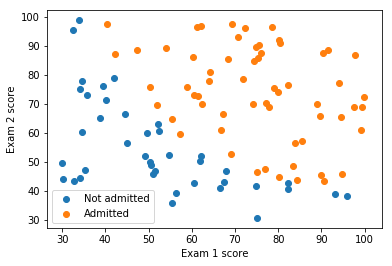

In [3]:
# ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

x_negative = X[y==0.]
x_positive = X[y==1.]

print(x_positive[:5])

plt.scatter(x_negative[:,0], x_negative[:,1], label='Not admitted')
plt.scatter(x_positive[:,0], x_positive[:,1], label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [4]:
# ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.concatenate((np.ones((m,1)), X), axis = 1)

# Initialize fitting parameters
initial_theta = np.zeros((3))
print(X[:5])
print(initial_theta)

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]
[ 0.  0.  0.]


In [5]:
# Sigmoid function
def sigmoid(z):  
    return np.divide(1, (1 + np.exp(-z)))



# Cost function
def cost(theta, X, y): 
    m = (len(X))
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    J = np.sum(first - second) / m
    print(J)
    return J


# Gradient function
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

# Compute and display initial cost and gradient
cost_initial = cost(initial_theta, X, y)
print("Cost at initial theta (zeros) = " + str(cost_initial))

gradient_initial = gradient(initial_theta, X, y)
print("Gradient at initial theta (zeros) = " + str(gradient_initial))

69.314718056
Cost at initial theta (zeros) = 69.314718056
Gradient at initial theta (zeros) = [ -10.         -656.44274057 -662.21998088]


In [6]:
print(y[:5])

[ 0.  0.  0.  1.  1.]


In [7]:
# ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.

from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(theta,X): #Logistic hypothesis function
    return expit(np.dot(X,theta))

#Cost function
def cost(theta,X,y): 

    first = np.dot(-np.array(y).T,np.log(h(theta,X)))
    second = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
    return float( (1./m) * ( np.sum(first - second)) )

# Compute and display initial cost and gradient
cost_initial = cost(initial_theta, X, y)

print("Cost at initial theta (zeros) = " + str(cost_initial))

from scipy import optimize

def optimizeTheta(theta,X,y,lambda_=0.):
    result = optimize.fmin(cost, x0=theta, args=(X, y), maxiter=400, full_output=True)
    return result[0], result[1]

mintheta, mincost = optimizeTheta(initial_theta,X,y)

print("cost at optimum theta = " + str(cost(mintheta, X, y)))
print("optimum theta = " + str(mintheta))

Cost at initial theta (zeros) = 0.6931471805599453
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
cost at optimum theta = 0.20349770159021519
optimum theta = [-25.16130062   0.20623142   0.20147143]


In [8]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(mintheta,np.array([1, 45.,85.])))

0.776291590411


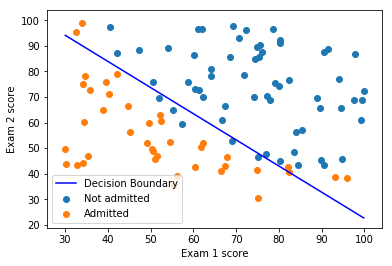

In [9]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./mintheta[2])*(mintheta[0] + mintheta[1]*boundary_xs)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.scatter(x_positive[:,0], x_positive[:,1], label='Not admitted')
plt.scatter(x_negative[:,0], x_negative[:,1], label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [10]:
def makePrediction(theta, x):
    return h(theta,x) >= 0.5

#Divide the sample into two: ones with positive classification, one with null classification
#pos = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 1])
#neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])

#Compute the percentage of samples I got correct:
x_positive_predict = np.concatenate((np.ones((len(x_positive),1)), x_positive), axis = 1)
x_negative_predict = np.concatenate((np.ones((len(x_negative),1)), x_negative), axis = 1)

pos_correct = float(np.sum(makePrediction(mintheta,x_positive_predict)))
neg_correct = float(np.sum(np.invert(makePrediction(mintheta,x_negative_predict))))
tot = len(x_positive)+len(x_negative)
prcnt_correct = float(pos_correct+neg_correct)/tot
print("Fraction of training samples correctly predicted: " + str(prcnt_correct))

Fraction of training samples correctly predicted: 0.89
